In [ ]:
print ([2, 5, 1] * 3)

[2, 5, 1, 2, 5, 1, 2, 5, 1]


In [ ]:
numVertices = 14

A, B, C, D, E, F, G, H, I, J, K, L, M, N = range (14) # A = 0, B = 1, C = 2, ...

adjlst = [[(B, 2), (J, 3)],           # A
          [(M, 6), (A, 2), (C, 2), (K, 1), (L, 7)],  # B
          [(G, 9), (B, 2)],           # C
          [(N, 1), (F, 3)],           # D
          [(G, 5)],              # E
          [(D, 3), (I, 2)],           # F
          [(H, 3), (C, 9), (L, 2), (E, 5)],     # G
          [(G, 3)],              # H
          [(F, 2)],              # I
          [(A, 3), (L, 1)],           # J
          [(L, 9), (B, 1)],           # K
          [(J, 1), (K, 9), (M, 2), (B, 7), (G, 2)],  # L
          [(L, 2), (B, 6)],           # M
          [(D, 1)]]              # N

# [OPTIONAL] convert index to uppercase letter
def idx2char (idx):
  return chr (ord ('A') + idx)

In [ ]:
def bellmanFord (adjlst, start):
  INFINITY = float ("inf")
  numVertices = len (adjlst)
  cost = [INFINITY] * numVertices
  cost[start] = 0
  parent = [False] * numVertices

  for i in range (numVertices - 1):
    for u in range (len (adjlst)):
      # for v, wgt in adjlst[u]:
      for pr in adjlst[u]:
        v = pr[0]
        wgt = pr[1]

        if cost[u] + wgt < cost[v]:
          parent[v] = u
          cost[v] = cost[u] + wgt

  print (cost)
  for i in range (len (parent)):
    if str (parent[i]) != "0" and parent[i] == False:
      print (f"No parent for {idx2char (i)}")
    else:
      print (f"Parent of {idx2char (i)} is {idx2char (parent[i])}")

bellmanFord (adjlst, G)

[6, 8, 9, inf, 5, inf, 0, 3, inf, 3, 9, 2, 4, inf]
Parent of A is J
Parent of B is A
Parent of C is G
No parent for D
Parent of E is G
No parent for F
No parent for G
Parent of H is G
No parent for I
Parent of J is L
Parent of K is B
Parent of L is G
Parent of M is L
No parent for N


Bellman-Ford vs Dijkstra

*  Dijkstra is generally always much faster, with runtime $\Theta (|V| + |E|\log|V|)$, compared to Bellman-Ford runtime $\Theta (|V||E|)$. So by default, we should use Dijkstra to find the shortest paths from a source vertex.
*  Dijkstra does NOT work if there are negative-weighted edges. If there are negative-weighted edges, we should use Bellman-Ford, which is slow, but actually works.

**Minimum Spanning Tree**

Given an undirected, weighted, connected graph (connected = every vertex can reach every vertex), construct another graph using edges from this graph that still connects all vertices ("spans" all vertices) but has the minimum total edge weight possible.

This graph will always contain no cycles, i.e., it will be a tree. The minimum spanning tree.

Given $|V|$ vertices, a tree with $|V|$ vertices must always contain $|V| - 1$ edges.

Running DFS, BFS or Dijkstra on a connected graph will always produce a spanning tree, but it might not be the minimum spanning tree.

To find a minimum spanning tree, there are two popular algorithms:

*  Prim's Algorithm
*  Kruskal's Algorithm

Prim's Algorithm is very similar to Dijkstra's Algorithm, with one small change:

*  In Dijkstra, when we consider using the edge $(u, v)$ with weight $wgt$ to update the cost for $v$, we calculate the new cost as $cost[u] + wgt$. In Prim's, we calculate the new cost as only $wgt$ instead.

In [ ]:
numVertices = 14

A, B, C, D, E, F, G, H, I, J, K, L, M, N = range (14) # A = 0, B = 1, C = 2, ...

adjlst = [[(B, 2), (J, 3)],           # A
          [(M, 6), (A, 2), (C, 2), (K, 1), (L, 7)],  # B
          [(G, 9), (B, 2), (D, 3)],           # C
          [(N, 1), (F, 3), (C, 3)],           # D
          [(G, 5)],              # E
          [(D, 3), (I, 2)],           # F
          [(H, 3), (C, 9), (L, 2), (E, 5)],     # G
          [(G, 3)],              # H
          [(F, 2), (J, 3)],              # I
          [(A, 3), (L, 1), (I, 3)],           # J
          [(L, 9), (B, 1)],           # K
          [(J, 1), (K, 9), (M, 2), (B, 7), (G, 2)],  # L
          [(L, 2), (B, 6)],           # M
          [(D, 1)]]              # N

# [OPTIONAL] convert index to uppercase letter
def idx2char (idx):
  return chr (ord ('A') + idx)

In [ ]:
import heapq

INFINITY = float ("inf")

def prims (adjlst, start = 0):
  visited = [False] * len (adjlst)
  parent = [False] * len (adjlst)
  cost = [INFINITY] * len (adjlst)
  cost[start] = 0

  pq = [(0, start)]

  while len (pq) != 0:
    cst, curr = heapq.heappop (pq)
    if visited[curr]:
      continue

    visited[curr] = True
    for nbr, wgt in adjlst[curr]:
      if visited[nbr] == False:
        if wgt < cost[nbr]:  # change cost[curr] + wgt to only wgt
          parent[nbr] = curr
          cost[nbr] = wgt    # change cost[curr] + wgt to only wgt
          heapq.heappush (pq, (cost[nbr], nbr))

  print (visited)
  print (cost)
  for i in range (len (parent)):
    if str (parent[i]) != "0" and parent[i] == False:
      print (f"No parent for {idx2char (i)}")
    else:
      print (f"Parent of {idx2char (i)} is {idx2char (parent[i])}")

prims (adjlst, G)

[True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[3, 2, 2, 3, 5, 3, 0, 3, 2, 1, 1, 2, 2, 1]
Parent of A is J
Parent of B is A
Parent of C is B
Parent of D is C
Parent of E is G
Parent of F is D
No parent for G
Parent of H is G
Parent of I is F
Parent of J is L
Parent of K is B
Parent of L is G
Parent of M is L
Parent of N is D


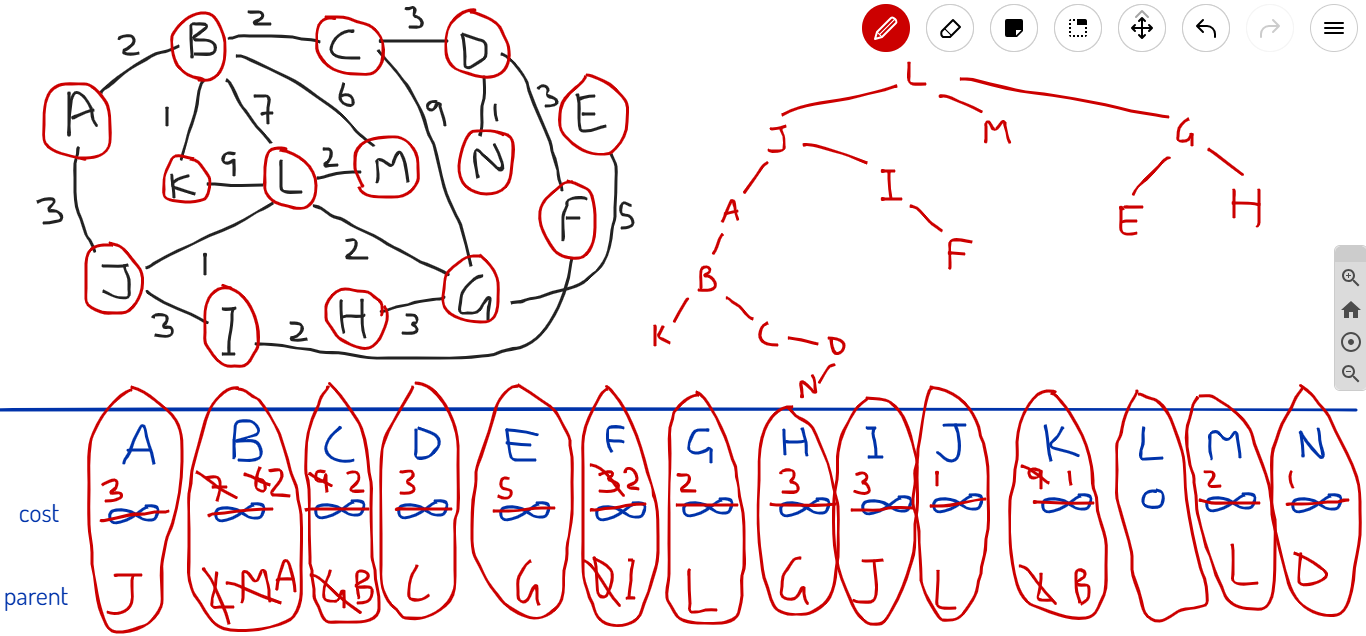

There could be multiple different MSTs for the same graph, but their total weight must be equal.

Runtime for Prim's Algorithm: Same as Dijkstra, which is $\Theta (|V| + |E|\log|V|)$

Kruskal's Algorithm: Get a list of all edges, sorted by weight. Go through this list while maintaining an initially empty answer graph. For each edge, if adding this edge to the answer graph does not produce a cycle, then add this edge to the answer graph. Otherwise, leave this edge and move on.

After going through all edges (or after adding exactly $|V| - 1$ edges to the answer graph), the answer graph should be a minimum spanning tree.

[OPTIONAL] The tricky part about implementing Kruskal's Algorithm is on how to detect whether adding an edge produces a cycle or not. This is typically achieved through a data structure known as Disjoint Set Union (DSU), which is beyond the scope of this course.